In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Machine Learning in Cybersecurity
Professor : Shanchieh Yang<br>
Student   :   Vazgen Tadevosyan <br></p>




#Clustering and Smote


1. [Imports](#1)
2. [Getting Data](#2)
3. [PCA](#3)
4. [Clustering](#4)
   - [Agglomerative clustering](#h)
   - [Kmeans](#k) 
   - [DBSCAN](#d)
5. [Smote](#5)  


<h1><a name="1">Imports</a></h1>

In [ ]:
#for not showing warnings
import os
import time
import glob
import warnings
warnings.filterwarnings('ignore')
#data manipulation and visualization libraries

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.manifold import TSNE
from math import e
from sklearn.model_selection import train_test_split
#libraries for modelling and evaluation
from sklearn.tree import export_graphviz
#in case of error run <<!pip install>> and run the code again
#in case of error run <<!pip install 'missing library'>> and run the code again
pd.set_option('max_rows', 100)
pd.set_option('max_colwidth', 100)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 100]


Reading the data

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/RIT/CyberSecurity/Data/preprocessed_for_clustering.csv")

In [ ]:
print("Label distribution of test data")
print(dataset["Label"].value_counts(),"\n"*2)
print(dataset["Label"].value_counts(normalize=True),"\n"*2)

Label distribution of test data
DDOS attack-HOIC            11660
DoS attacks-SlowHTTPTest    10865
DDoS attacks-LOIC-HTTP       5774
DoS attacks-Hulk             4656
Infilteration                3921
Bot                          2814
FTP-BruteForce               1920
SSH-Bruteforce               1914
DoS attacks-GoldenEye         397
Name: Label, dtype: int64 


DDOS attack-HOIC            0.265477
DoS attacks-SlowHTTPTest    0.247376
DDoS attacks-LOIC-HTTP      0.131463
DoS attacks-Hulk            0.106009
Infilteration               0.089274
Bot                         0.064070
FTP-BruteForce              0.043715
SSH-Bruteforce              0.043578
DoS attacks-GoldenEye       0.009039
Name: Label, dtype: float64 




 <h1><a name="3">PCA</a></h1>

Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.It is used for data reduction, in our project we need it because out clustering methods worked better and faster on principal components rather than original data

In [ ]:
scaler = StandardScaler()
transformed_train_numeric = pd.DataFrame(scaler.fit_transform(dataset.drop(columns="Label")),columns=dataset.drop(columns="Label").columns)
pca = PCA(n_components=10)

In [ ]:
for_clustering = dataset.copy(deep=True)
print(for_clustering.shape)
transformed_train_numeric_for_clustering = pd.DataFrame(scaler.fit_transform(for_clustering.drop(columns = ["Label"])),columns=for_clustering.drop(columns = ["Label"]).columns)
print(transformed_train_numeric_for_clustering.shape)

(43921, 77)
(43921, 76)


[0.35992311 0.18518318 0.10358891 0.07584101 0.07311992 0.05309156
 0.02904177 0.02416122 0.01553062 0.01462552]


Text(0, 0.5, 'Cumulative explained variance')

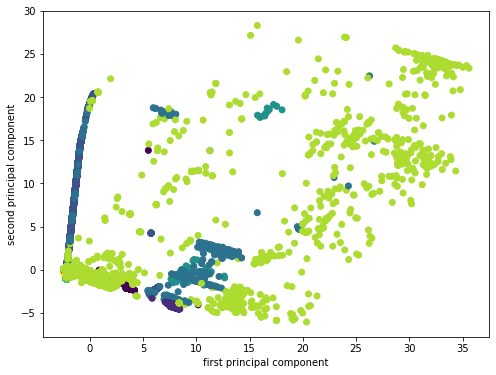

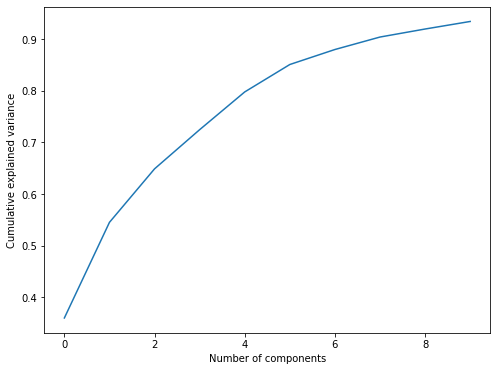

In [ ]:
pca = PCA(n_components=10)
pca_transformed = pca.fit_transform(transformed_train_numeric_for_clustering)
plt.figure(figsize=(8,6))
plt.scatter(pca_transformed[:,0],pca_transformed[:,1], c=for_clustering.Label.astype('category').cat.codes)
plt.xlabel('first principal component')
plt.ylabel('second principal component')

print(pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

From the plot it is seen that we have PCA data which explains 0.9 variation of original data

In [ ]:
for_clustering.reset_index(drop=True, inplace=True)

In [ ]:
transformed_train_numeric_for_clustering.shape

(43921, 76)

In [ ]:
pca_transformed = pd.DataFrame(pca_transformed)
pca_transformed.shape

(43921, 10)

In [ ]:
pca_transformed = pd.DataFrame(pca_transformed)
pca_transformed["Label"] = for_clustering["Label"]
pca_transformed2 = pca_transformed.sample(frac=1).sample(frac=0.2)
len(pca_transformed2)

8784

In [ ]:
print(pca_transformed2["Label"].value_counts())

DDOS attack-HOIC            2282
DoS attacks-SlowHTTPTest    2161
DDoS attacks-LOIC-HTTP      1174
DoS attacks-Hulk             904
Infilteration                803
Bot                          619
FTP-BruteForce               389
SSH-Bruteforce               379
DoS attacks-GoldenEye         73
Name: Label, dtype: int64


 <h1><a name="4">Clustering</a></h1>

 <h2><a name="h">Agglomerative clustering </a></h2>





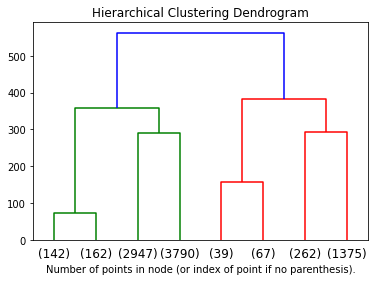

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(pca_transformed2.drop("Label",axis=1))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
pca_transformed2["Label"].value_counts()

DDOS attack-HOIC            2282
DoS attacks-SlowHTTPTest    2161
DDoS attacks-LOIC-HTTP      1174
DoS attacks-Hulk             904
Infilteration                803
Bot                          619
FTP-BruteForce               389
SSH-Bruteforce               379
DoS attacks-GoldenEye         73
Name: Label, dtype: int64


\begin{align}
  H(X) = -\sum_{x}{p(x) * log_2\,{p(x)}}
\end{align}

In [ ]:
dct = {}
for k in range(2,9):
  model = AgglomerativeClustering(compute_distances=True,linkage='ward',n_clusters=k).fit(pca_transformed2.drop("Label",axis=1))
  pca_transformed2['cluster'] = model.fit_predict(pca_transformed2.drop("Label",axis=1))
  temp = round((pd.crosstab(pca_transformed2.cluster, pca_transformed2.Label, margins=True, margins_name="Total")),2)
  def pandas_entropy(column, base=None):
      """Calculate entropy of columns"""
      vc = pd.Series(column)
      p = vc/vc["Total"]
      base = len(column)-1
      base = e if base <=2  else base
      return -(p * (np.log(p)/np.log(e))).sum()
  average = np.mean(temp.apply(pandas_entropy))
  dct[k]=average

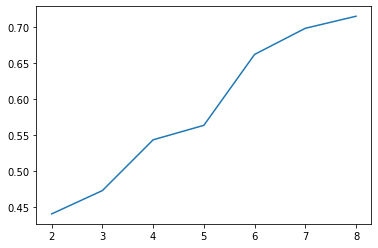

{2: 0.4399295612892703,
 3: 0.47245316758447037,
 4: 0.5432094361846238,
 5: 0.5633753529052827,
 6: 0.6621792213096758,
 7: 0.6986052030956904,
 8: 0.7153980198744347}

In [ ]:
lists = sorted(dct.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.show()
dct

We tried to use Malicious labels to calculate entropy of of each cluster, however it was not good indicatior of cluster purity

In [ ]:
model = AgglomerativeClustering(compute_distances=True,linkage='ward').fit(pca_transformed2.drop("Label",axis=1))
pca_transformed2['cluster'] = model.fit_predict(pca_transformed2.drop("Label",axis=1))
temp = round((pd.crosstab(pca_transformed2.cluster, pca_transformed2.Label, margins=True, margins_name="Total")),2)
temp

Label,Bot,DDOS attack-HOIC,DDoS attacks-LOIC-HTTP,DoS attacks-GoldenEye,DoS attacks-Hulk,DoS attacks-SlowHTTPTest,FTP-BruteForce,Infilteration,SSH-Bruteforce,Total
cluster,,,,,,,,,,
0,0,300,602,50,45,0,0,193,200,1390
1,619,1982,572,23,859,2161,389,610,179,7394
Total,619,2282,1174,73,904,2161,389,803,379,8784


In [ ]:
model = AgglomerativeClustering(compute_distances=True,linkage='ward',n_clusters=8).fit(pca_transformed2.drop("Label",axis=1))
pca_transformed2['cluster'] = model.fit_predict(pca_transformed2.drop("Label",axis=1))
temp = round((pd.crosstab(pca_transformed2.cluster, pca_transformed2.Label, margins=True, margins_name="Total")),2)
temp

Label,Bot,DDOS attack-HOIC,DDoS attacks-LOIC-HTTP,DoS attacks-GoldenEye,DoS attacks-Hulk,DoS attacks-SlowHTTPTest,FTP-BruteForce,Infilteration,SSH-Bruteforce,Total
cluster,,,,,,,,,,
0,0,0,0,1,1,0,0,104,0,106
1,0,0,0,0,0,0,0,62,200,262
2,0,300,602,49,44,0,0,27,0,1022
3,0,0,292,7,0,0,0,5,0,304
4,320,1982,277,16,859,0,0,114,0,3568
5,0,0,0,0,0,2161,389,218,179,2947
6,0,0,0,0,0,0,0,222,0,222
7,299,0,3,0,0,0,0,51,0,353
Total,619,2282,1174,73,904,2161,389,803,379,8784


In [ ]:
round((pd.crosstab(pca_transformed2.cluster, pca_transformed2.Label, margins=True, margins_name="Total", normalize="columns")*100),2).astype(str)+'%'

Label,Bot,DDOS attack-HOIC,DDoS attacks-LOIC-HTTP,DoS attacks-GoldenEye,DoS attacks-Hulk,DoS attacks-SlowHTTPTest,FTP-BruteForce,Infilteration,SSH-Bruteforce,Total
cluster,,,,,,,,,,
0,0.0%,0.0%,0.0%,1.37%,0.11%,0.0%,0.0%,12.95%,0.0%,1.21%
1,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,7.72%,52.77%,2.98%
2,0.0%,13.15%,51.28%,67.12%,4.87%,0.0%,0.0%,3.36%,0.0%,11.63%
3,0.0%,0.0%,24.87%,9.59%,0.0%,0.0%,0.0%,0.62%,0.0%,3.46%
4,51.7%,86.85%,23.59%,21.92%,95.02%,0.0%,0.0%,14.2%,0.0%,40.62%
5,0.0%,0.0%,0.0%,0.0%,0.0%,100.0%,100.0%,27.15%,47.23%,33.55%
6,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,27.65%,0.0%,2.53%
7,48.3%,0.0%,0.26%,0.0%,0.0%,0.0%,0.0%,6.35%,0.0%,4.02%


By choosing number of clusters 8 we are able to group some labels into group below you may see Group with respective labels

Group1 = Bot, DDosHoic, DosHulk<br>
Group2 = BruteForce, SlowHttpTest




In [ ]:
# model = AgglomerativeClustering(n_clusters=2,linkage='single').fit(pca_transformed2.drop("Label",axis=1))
# pca_transformed2['cluster'] = model.fit_predict(pca_transformed2.drop("Label",axis=1))
# round((pd.crosstab(pca_transformed2.cluster, pca_transformed2.Label, margins=True, margins_name="Total", normalize="columns")*100),2).astype(str)+'%'

Label,Bot,DDOS attack-HOIC,DDoS attacks-LOIC-HTTP,DoS attacks-GoldenEye,DoS attacks-Hulk,DoS attacks-SlowHTTPTest,FTP-BruteForce,Infilteration,SSH-Bruteforce,Total
cluster,,,,,,,,,,
0,100.0%,100.0%,100.0%,100.0%,99.78%,100.0%,100.0%,100.0%,100.0%,99.98%
1,0.0%,0.0%,0.0%,0.0%,0.22%,0.0%,0.0%,0.0%,0.0%,0.02%


In [ ]:
# model = AgglomerativeClustering(n_clusters=2,linkage='average').fit(pca_transformed2.drop("Label",axis=1))
# pca_transformed2['cluster'] = model.fit_predict(pca_transformed2.drop("Label",axis=1))
# round((pd.crosstab(pca_transformed2.cluster, pca_transformed2.Label, margins=True, margins_name="Total", normalize="columns")*100),2).astype(str)+'%'

Label,Bot,DDOS attack-HOIC,DDoS attacks-LOIC-HTTP,DoS attacks-GoldenEye,DoS attacks-Hulk,DoS attacks-SlowHTTPTest,FTP-BruteForce,Infilteration,SSH-Bruteforce,Total
cluster,,,,,,,,,,
0,0.0%,0.0%,0.0%,6.17%,0.22%,0.0%,0.0%,10.73%,0.0%,1.04%
1,100.0%,100.0%,100.0%,93.83%,99.78%,100.0%,100.0%,89.27%,100.0%,98.96%


In [ ]:
df = pca_transformed2.groupby(['cluster',"Label"],as_index=False).size()
df

,cluster,Label,size
0,0,Bot,1
1,0,DoS attacks-GoldenEye,1
2,0,DoS attacks-Hulk,4
3,0,Infilteration,113
4,1,Infilteration,70
5,1,SSH-Bruteforce,208
6,2,Bot,280
7,2,DDOS attack-HOIC,297
8,2,DoS attacks-GoldenEye,8
9,2,DoS attacks-Hulk,24


In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(pca_transformed2.drop(columns=["Label","cluster"]))
df = pd.DataFrame()
df["y"] = pca_transformed2["cluster"]
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]


[Text(0.5, 1.0, 'Iris data T-SNE projection')]

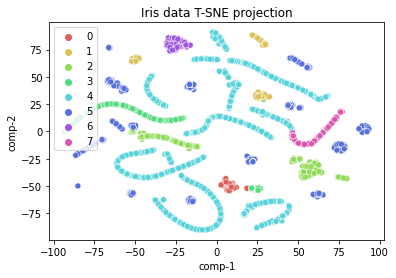

In [ ]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 8),
                data=df).set(title="Iris data T-SNE projection") 

In [ ]:
g_sum = df.groupby('cluster')['size'].transform('sum')
values = df['size']/g_sum
df['Entropy'] = -(values*np.log(values))
df1 = df.groupby('cluster',as_index=False,sort=False)['Entropy'].sum()
df1

,cluster,Entropy
0,0,0.243493
1,1,0.564302
2,2,1.022774
3,3,0.405591
4,4,1.201785
5,5,0.862104
6,6,0.000000
7,7,0.234982


 <h2><a name="k">Kmeans </a></h2>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
SSE2={}
for i in range(2,10):
    cluster_try=KMeans(i)
    cluster_try.fit_predict(pca_transformed.drop(columns="Label"))
    SSE2[i]=[cluster_try.inertia_,silhouette_score(pca_transformed.drop(columns="Label"),cluster_try.labels_,metric='euclidean')]
SSE2

{2: [1748055.7938082004, 0.5796796326963383],
 3: [1367763.8111196777, 0.5774226748358297],
 4: [1026825.0546514092, 0.6181382951398483],
 5: [815137.7926031052, 0.596778624787913],
 6: [606210.8010826783, 0.6285087243063859],
 7: [455635.1275824264, 0.6885544348462832],
 8: [376801.2598272167, 0.7077128911223389],
 9: [327351.3683170025, 0.7156297921384179]}

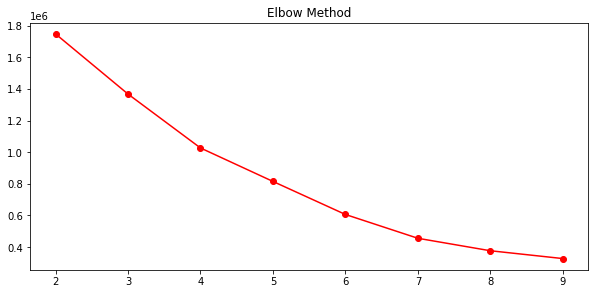

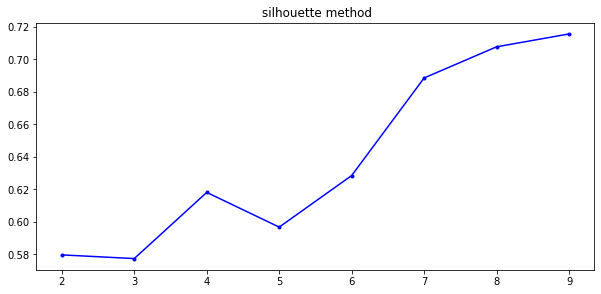

In [ ]:
Eblow=[]
Silhout=[]
for key,value in SSE2.items():
    Eblow.append(value[0])
    Silhout.append(value[1])

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

plt.plot(list(SSE2.keys()),Eblow,marker='o',color='red')
plt.title("Elbow Method")
plt.show()
plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.plot(list(SSE2.keys()),Silhout,marker='.',color='blue')
plt.title(" silhouette method")
plt.show()

In [ ]:

print(for_clustering.shape)
print(transformed_train_numeric_for_clustering.shape)

(43921, 77)
(43921, 76)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
SSE={}
for i in range(2,10):
    cluster_try=KMeans(i)
    cluster_try.fit_predict(transformed_train_numeric_for_clustering)
    SSE[i]=[cluster_try.inertia_,silhouette_score(transformed_train_numeric_for_clustering,cluster_try.labels_,metric='euclidean')]
SSE

{2: [1927275.9141480625, 0.5611959676990174],
 3: [1546721.5291349916, 0.5559848302385823],
 4: [1205296.9210351862, 0.5944574020206581],
 5: [993536.794943652, 0.5455305123890198],
 6: [784314.6957235438, 0.57592681733346],
 7: [633543.2642420111, 0.62999202097885],
 8: [554111.262255929, 0.6490250466343235],
 9: [498789.00616872136, 0.6519491434406838]}

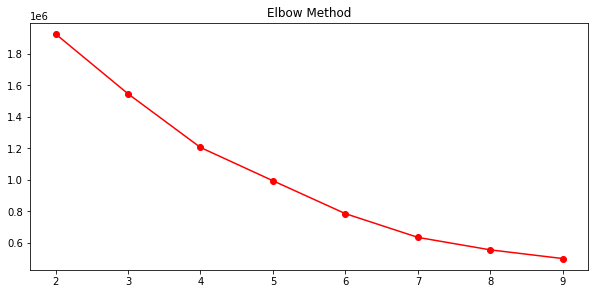

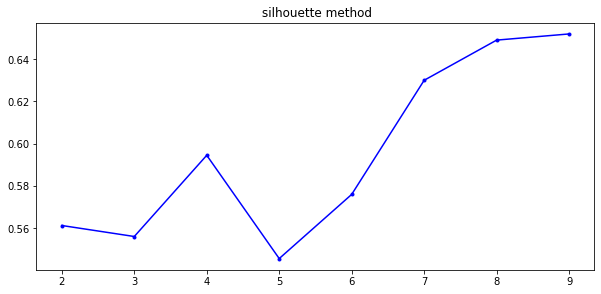

In [ ]:
Eblow=[]
Silhout=[]
for key,value in SSE.items():
    Eblow.append(value[0])
    Silhout.append(value[1])

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)

plt.plot(list(SSE.keys()),Eblow,marker='o',color='red')
plt.title("Elbow Method")
plt.show()
plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
plt.plot(list(SSE.keys()),Silhout,marker='.',color='blue')
plt.title(" silhouette method")
plt.show()

In [ ]:

np.array([value[0] for value in SSE2.values()])<=np.array([value[0] for value in SSE.values()])

array([ True,  True,  True,  True,  True,  True,  True,  True])

From this analysis we found out that K-means also performs well on PCA data rather than on data with all features

In [ ]:
#KNN with 3 k
cluster_try=KMeans(8)
pca_transformed['cluster'] = cluster_try.fit_predict(pca_transformed.drop(columns="Label"))
pca_transformed['Label'] = for_clustering["Label"]


In [ ]:
pd.crosstab(pca_transformed.cluster, pca_transformed.Label, margins=True, margins_name="Total")

Label,Bot,DDOS attack-HOIC,DDoS attacks-LOIC-HTTP,DoS attacks-GoldenEye,DoS attacks-Hulk,DoS attacks-SlowHTTPTest,FTP-BruteForce,Infilteration,SSH-Bruteforce,Total
cluster,,,,,,,,,,
0,6,0,0,0,0,10865,1920,321,537,13649
1,1405,1617,0,52,132,0,0,54,0,3260
2,1402,10042,1028,73,4422,0,0,1466,410,18843
3,0,0,0,9,12,0,0,416,0,437
4,1,0,1913,58,1,0,0,37,0,2010
5,0,1,2822,205,87,0,0,108,0,3223
6,0,0,0,0,2,0,0,336,967,1305
7,0,0,11,0,0,0,0,1183,0,1194
Total,2814,11660,5774,397,4656,10865,1920,3921,1914,43921


The results are pretty much the same with Agglomerative Clustering so its reasonable to merge those clusters.<br>
Merging DDOS attack-HOIC, Hulk, DoS attacks || SlowHTTPTEST, FTP-BruteForce -Agloremative<br>
Merging DDOS attack-HOIC, Hulk, DoS attacks || SlowHTTPTEST, FTP-BruteForce - K_Means

 <h2><a name="d">DBSCAN </a></h2>

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [ ]:
data_dbscan = transformed_train_numeric_for_clustering.drop(columns=["Label","cluster"])
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_dbscan)
distance, indices = nbrs.kneighbors(data_dbscan)

In [ ]:
distances = np.sort(distance, axis=0)
distances[:,1]

array([ 0.        ,  0.        ,  0.        , ..., 15.27767858,
       16.18882075, 18.32076608])

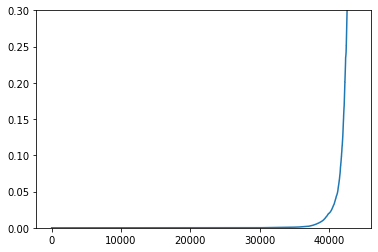

In [ ]:
distances = np.sort(distance, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.ylim((0, 0.3)) 
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(transformed_train_numeric_for_clustering.drop(columns="Label"))

DBSCAN(eps=0.05)

In [ ]:
len(np.unique(dbscan.labels_))

179

In [ ]:
clusters = dbscan.fit_predict(data_dbscan)
np.unique(clusters)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167])

In [ ]:
pd.value_counts(clusters)

 7      10217
 105    10030
-1       3838
 5       3771
 22      2834
        ...  
 73         5
 167        5
 159        4
 139        4
 163        3
Length: 169, dtype: int64

In [ ]:
indices = np.argwhere((clusters==7)|(clusters==105)|(clusters==5)|(clusters==22)|(clusters==-1))
data_dbscan['clusters'] = clusters
indices = np.squeeze(indices)

In [ ]:
data_dbscan2 = data_dbscan.iloc[indices,:]
data_dbscan2["Label"] = transformed_train_numeric_for_clustering.loc[indices,"Label"]

In [ ]:
transformed_train_numeric_for_clustering["Label"].value_counts()

DDOS attack-HOIC            11629
DoS attacks-SlowHTTPTest    10855
DDoS attacks-LOIC-HTTP       5742
DoS attacks-Hulk             4638
Infilteration                3900
Bot                          2808
FTP-BruteForce               1916
SSH-Bruteforce               1891
DoS attacks-GoldenEye         419
Name: Label, dtype: int64

In [ ]:
round((pd.crosstab(data_dbscan2.clusters, data_dbscan2.Label, margins=True, margins_name="Total")))

Label,Bot,DDOS attack-HOIC,DDoS attacks-LOIC-HTTP,DoS attacks-GoldenEye,DoS attacks-Hulk,DoS attacks-SlowHTTPTest,FTP-BruteForce,Infilteration,SSH-Bruteforce,Total
clusters,,,,,,,,,,
-1,44,577,215,319,268,0,0,2376,39,3838
5,0,0,0,0,3771,0,0,0,0,3771
7,0,0,0,0,0,8587,1627,0,3,10217
22,0,0,2834,0,0,0,0,0,0,2834
105,0,10030,0,0,0,0,0,0,0,10030
Total,44,10607,3049,319,4039,8587,1627,2376,42,30690


In [ ]:
round((pd.crosstab(data_dbscan.clusters, data_dbscan.Label, margins=True, margins_name="Total", normalize="columns")*100),2).astype(str)+'%'

Label,DDOS attack-HOIC,DDoS attacks-LOIC-HTTP,DoS attacks-Hulk,DoS attacks-SlowHTTPTest,FTP-BruteForce,SSH-Bruteforce,Total
clusters,,,,,,,
5,0.0%,0.0%,100.0%,0.0%,0.0%,0.0%,14.04%
7,0.0%,0.0%,0.0%,100.0%,100.0%,100.0%,38.05%
22,0.0%,100.0%,0.0%,0.0%,0.0%,0.0%,10.55%
105,100.0%,0.0%,0.0%,0.0%,0.0%,0.0%,37.35%


Overall DBSCAN was not good clustering method for this data as it produced 169 clusters. 